In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('F:\ML\Datasets\TravelInsurancePrediction.csv')

data.head(2)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [7]:
cate_fea = [features for features in data.columns if data[features].dtype=='O']

In [8]:
for features in cate_fea:
    print("{}: {} this many values missed ".format(features, data[features].isnull().sum()))

Employment Type: 0 this many values missed 
GraduateOrNot: 0 this many values missed 
FrequentFlyer: 0 this many values missed 
EverTravelledAbroad: 0 this many values missed 


In [9]:
data[cate_fea].head()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No


In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [11]:
for features in cate_fea:
    data[features] = enc.fit_transform(data[features])

In [12]:
data[cate_fea].head()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,0,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,1,0


In [13]:
data.dtypes

Age                    int64
Employment Type        int32
GraduateOrNot          int32
AnnualIncome           int64
FamilyMembers          int64
ChronicDiseases        int64
FrequentFlyer          int32
EverTravelledAbroad    int32
TravelInsurance        int64
dtype: object

In [14]:
data.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0


# correlation

In [15]:
#the correlation matrix

crr = data.corr()
crr

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

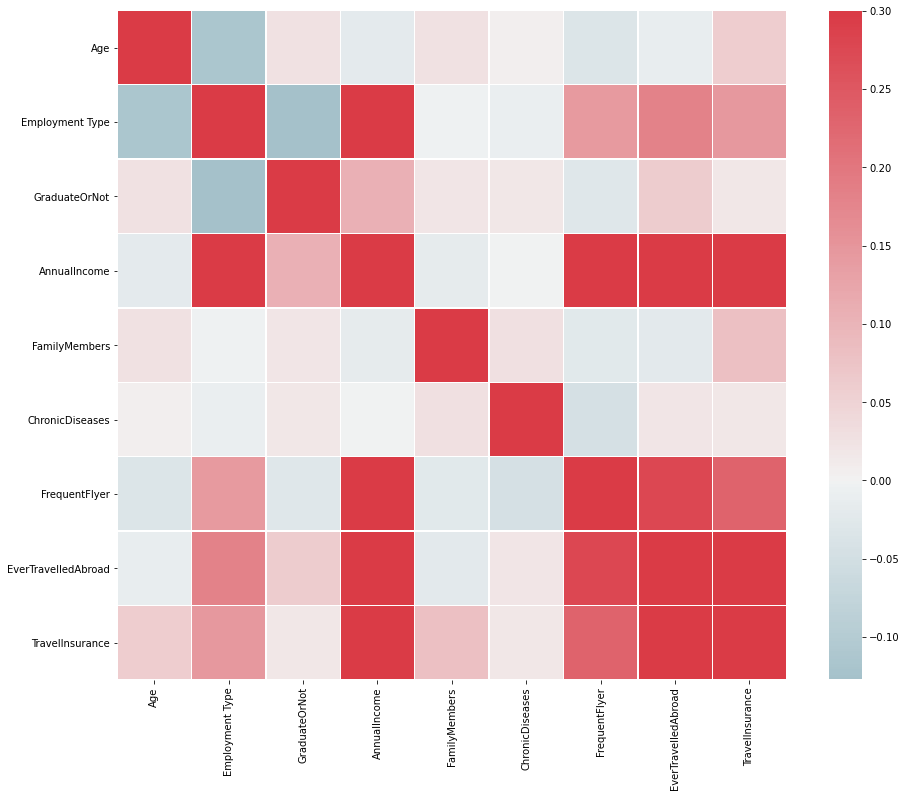

In [16]:
plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(crr, xticklabels=crr.columns.values, yticklabels=crr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})

In [17]:
# Extract the deposte_new column (the dependent variable)

corr_Survived = pd.DataFrame(crr['TravelInsurance'].drop('TravelInsurance'))
corr_Survived.sort_values(by = 'TravelInsurance', ascending = False)

,TravelInsurance
EverTravelledAbroad,0.433183
AnnualIncome,0.396763
FrequentFlyer,0.232103
Employment Type,0.147847
FamilyMembers,0.079909
Age,0.061060
GraduateOrNot,0.018934
ChronicDiseases,0.018190


In [18]:
X= data.drop(['TravelInsurance'], axis=1)
y= data.TravelInsurance

In [19]:
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0,1,400000,6,1,0,0
1,31,1,1,1250000,7,0,0,0
2,34,1,1,500000,4,1,0,0
3,28,1,1,700000,3,1,0,0
4,28,1,1,700000,8,1,1,0


In [20]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(1390, 8)
(597, 8)


In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


# LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.6683417085427136


In [26]:
from sklearn.metrics import roc_auc_score

test_auc = roc_auc_score(y_test, y_pred)
print("Test ROC-AUC Score: ", test_auc)

Test ROC-AUC Score:  0.5


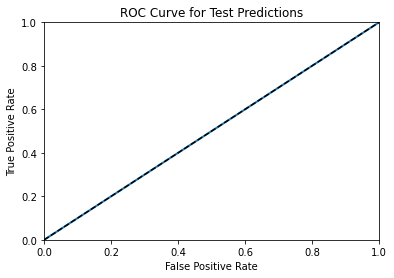

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--") #"k--" -> dashed line 
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr, tpr)
plt.title("ROC Curve for Test Predictions");

# K-Nearest Neighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(X_train,y_train)
result=k.predict(X_test)
print(accuracy_score(y_test,result))

0.7956448911222781


# Decision Tree Classifer

In [29]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_train,y_train)
y_pred=d.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7554438860971524


# Random Forest Classifier (Bagging)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7906197654941374


# Gradient Boost Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.8375209380234506


# Support Vector Machine

In [32]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.8023450586264657


# Naive Bayes Classification Gaussian NB

In [33]:
# There are 3 different Naive Bayes Classes.
from sklearn.naive_bayes import GaussianNB 
#If the data or column you guess is continuous (real, decimal, etc.)
from sklearn.naive_bayes import BernoulliNB 
#If the data or column you guess is binary.(Yes / No, etc.)
from sklearn.naive_bayes import MultinomialNB 
#If the data or column you guess is nominal (Int numbers)

g=GaussianNB()
b=BernoulliNB()
#m=MultinomialNB()

g.fit(X_train,y_train)
b.fit(X_train,y_train) 
#m.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

pred1=g.predict(X_test)
pred2=b.predict(X_test)
#pred3=m.predict(X_test)

print(accuracy_score(y_test,pred1),precision_score(y_test,pred1),
      recall_score(y_test,pred1),f1_score(y_test,pred1))
print(accuracy_score(y_test,pred2),precision_score(y_test,pred2),
      recall_score(y_test,pred2),f1_score(y_test,pred2))
#print(accuracy_score(y_test,pred3),precision_score(y_test,pred3),
      #recall_score(y_test,pred3),f1_score(y_test,pred3))
print("\n")
# the best estimate will give bernouilli of course.(Attrition->hire or not)
print(confusion_matrix(y_test,pred2))
#true positive 848 and true negative 172
#false positive 59 and false negative 126

print(classification_report(y_test,pred2))

0.7755443886097152 0.6927710843373494 0.5808080808080808 0.631868131868132
0.7252931323283082 0.5904255319148937 0.5606060606060606 0.5751295336787564


[[322  77]
 [ 87 111]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       399
           1       0.59      0.56      0.58       198

    accuracy                           0.73       597
   macro avg       0.69      0.68      0.69       597
weighted avg       0.72      0.73      0.72       597



# K-Nearest Neighbors Classifier with applying  StandardScaler

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(X_train,y_train)
result=k.predict(X_test)
print(accuracy_score(y_test,result))

0.7889447236180904


In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print('LogisticRegression after applying Standard scaler', accuracy_score(y_test,y_pred))



LogisticRegression after applying Standard scaler 0.7705192629815746


In [38]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_train,y_train)
y_pred=d.predict(X_test)

print('DecisionTreeClassifier model after applying Standard scaler',accuracy_score(y_test,y_pred))

DecisionTreeClassifier model after applying Standard scaler 0.7520938023450586


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print('RandomForestClassifier model after applying Standard scaler',accuracy_score(y_test,y_pred))

RandomForestClassifier model after applying Standard scaler 0.7922948073701842


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)

print('GradientBoostingClassifier model after applying Standard scaler',accuracy_score(y_test,y_pred))

GradientBoostingClassifier model after applying Standard scaler 0.8375209380234506


In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('SVM Classifier model after applying Standard scaler',accuracy_score(y_test,y_pred))

SVM Classifier model after applying Standard scaler 0.8190954773869347


In [42]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')
import time 
from lazypredict.Supervised import LazyClassifier,LazyRegressor

clsmodel=LazyClassifier(verbose=0,predictions=True)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=clsmodel.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

# to check which model did better on the UNSW-NB15 dataset 
models_c


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.48it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.82,0.78,0.78,0.81,0.12
AdaBoostClassifier,0.83,0.76,0.76,0.82,0.20
XGBClassifier,0.80,0.76,0.76,0.79,0.15
SVC,0.82,0.76,0.76,0.81,0.11
NuSVC,0.82,0.76,0.76,0.81,0.11
KNeighborsClassifier,0.79,0.75,0.75,0.79,0.06
RandomForestClassifier,0.77,0.73,0.73,0.77,0.36
ExtraTreesClassifier,0.77,0.73,0.73,0.77,0.33
QuadraticDiscriminantAnalysis,0.79,0.73,0.73,0.78,0.02


In [43]:
from sklearn.preprocessing import StandardScaler

feature_scale=[feature for feature in data.columns if feature not in ['TravelInsurance']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

scaler.transform(data[feature_scale])
# transform the train and test set, and add on the SalePrice variable
msd = pd.concat([data[['TravelInsurance']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)


In [44]:
msd.head()

,TravelInsurance,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,0.60,0.00,1.00,0.07,0.57,1.00,0.00,0.00
1,0,0.60,1.00,1.00,0.63,0.71,0.00,0.00,0.00
2,1,0.90,1.00,1.00,0.13,0.29,1.00,0.00,0.00
3,0,0.30,1.00,1.00,0.27,0.14,1.00,0.00,0.00
4,0,0.30,1.00,1.00,0.27,0.86,1.00,1.00,0.00


In [45]:
X= msd.drop(['TravelInsurance'], axis=1)
y= msd.TravelInsurance

In [46]:
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.60,0.00,1.00,0.07,0.57,1.00,0.00,0.00
1,0.60,1.00,1.00,0.63,0.71,0.00,0.00,0.00
2,0.90,1.00,1.00,0.13,0.29,1.00,0.00,0.00
3,0.30,1.00,1.00,0.27,0.14,1.00,0.00,0.00
4,0.30,1.00,1.00,0.27,0.86,1.00,1.00,0.00


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(x_train,y_train)
result=k.predict(x_test)
print('KNeighborsClassifier after applying MinMax scaler',accuracy_score(y_test,result))

KNeighborsClassifier after applying MinMax scaler 0.7889447236180904


In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print('LogisticRegression model after applying MinMax scaler',accuracy_score(y_test,y_pred))

LogisticRegression model after applying MinMax scaler 0.7705192629815746


In [50]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
y_pred=d.predict(x_test)

print('DecisionTreeClassifier modelafter applying MinMax scaler',accuracy_score(y_test,y_pred))

DecisionTreeClassifier modelafter applying MinMax scaler 0.7554438860971524


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('RandomForestClassifier model after applying MinMax scaler',accuracy_score(y_test,y_pred))

RandomForestClassifier model after applying MinMax scaler 0.7839195979899497


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

print('GradientBoostingClassifier modelafter applying MinMax scaler',accuracy_score(y_test,y_pred))

GradientBoostingClassifier modelafter applying MinMax scaler 0.8375209380234506


In [53]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

print('SVC modelafter applying MinMax scaler',accuracy_score(y_test,y_pred))

SVC modelafter applying MinMax scaler 0.8073701842546064


In [54]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')
import time 
from lazypredict.Supervised import LazyClassifier,LazyRegressor

clsmodel=LazyClassifier(verbose=0,predictions=True)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=clsmodel.fit(x_train, x_test, y_train, y_test)
end_time_1=time.time()

# to check which model did better on the UNSW-NB15 dataset 
models_c


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.51it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.82,0.78,0.78,0.81,0.11
AdaBoostClassifier,0.83,0.76,0.76,0.82,0.20
XGBClassifier,0.80,0.76,0.76,0.79,0.14
SVC,0.82,0.76,0.76,0.81,0.11
NuSVC,0.82,0.76,0.76,0.81,0.13
KNeighborsClassifier,0.79,0.75,0.75,0.78,0.07
RandomForestClassifier,0.77,0.73,0.73,0.77,0.37
ExtraTreesClassifier,0.77,0.73,0.73,0.77,0.32
QuadraticDiscriminantAnalysis,0.79,0.73,0.73,0.78,0.02
